$\textbf{What does the TEC signal look like?}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


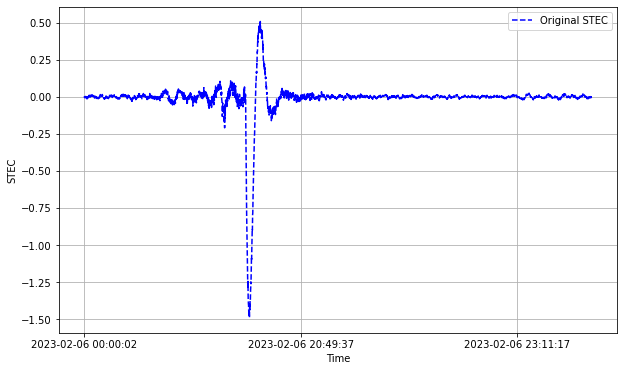

In [2]:
# Load STEC data
df = pd.read_csv('BSHM_230206.csv')
df['UTCTime'] = pd.to_datetime(df['UTCTime'], format='%y%m%d%H%M%S')
df['FormattedTime'] = df['UTCTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
satellite_1 = 'GPS41'
df_gps41 = df[(df['sat'] == 'GPS41') & (df['FormattedTime'] >= '2023-01-01 01:00:00')]

# Extractingg data for the selected satellite
stec = df[df['sat'] == satellite_1]['stec'].values
t_sat1 = df[df['sat'] == satellite_1]['FormattedTime'].values

# Interpolate the STEC data
#stec_interpolated = np.interp(np.arange(0, len(data_satellite_1)), np.arange(0, len(data_satellite_1), 1), data_satellite_1)

# Plot the interpolated STEC data
plt.figure(figsize=(10, 6))
plt.plot(t_sat1, stec, linestyle='--', color='b', label='Original STEC')
#plt.plot(t_sat1, stec_interpolated, linestyle='dotted', color='r', label='Interpolated STEC')
plt.xlabel('Time')
plt.ylabel('STEC')
plt.xticks(np.arange(0, len(t_sat1), 1700))
plt.grid(True)
plt.legend()
plt.show()


$\textbf{Convolution of the TEC signal with a dirac}$

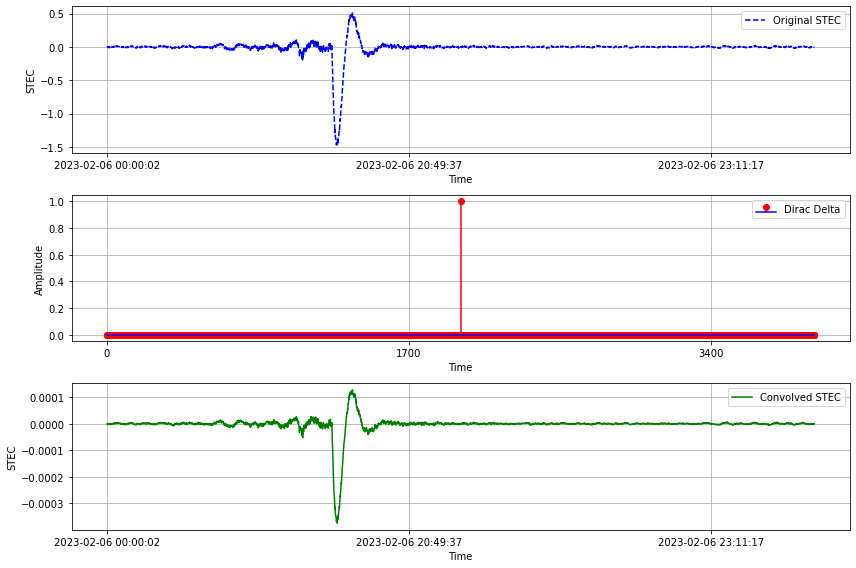

In [3]:
# Define a Dirac delta function (impulse)
dirac_delta = np.zeros_like(stec)
dirac_delta[len(dirac_delta) // 2] = 1.0  # Impulse at the middle of the signal

# Convolve the STEC signal with the Dirac delta function
convolved_signal = np.convolve(stec, dirac_delta, mode='same') / len(dirac_delta)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the original and interpolated STEC data
plt.subplot(3, 1, 1)
plt.plot(t_sat1, stec, linestyle='--', color='b', label='Original STEC')
#plt.plot(t_sat1, stec_interpolated, linestyle='dotted', color='r', label='Interpolated STEC')
plt.xlabel('Time')
plt.ylabel('STEC')
plt.xticks(np.arange(0, len(t_sat1), 1700))
plt.grid(True)
plt.legend()

# Plot the Dirac delta function
plt.subplot(3, 1, 2)
plt.stem(dirac_delta, linefmt='r-', markerfmt='ro', basefmt='b-', label='Dirac Delta')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, len(t_sat1), 1700))
plt.grid(True)
plt.legend()

# Plot the convolved signal
plt.subplot(3, 1, 3)
plt.plot(t_sat1, convolved_signal, color='g', label='Convolved STEC')
plt.xlabel('Time')
plt.ylabel('STEC')
plt.xticks(np.arange(0, len(t_sat1), 1700))
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

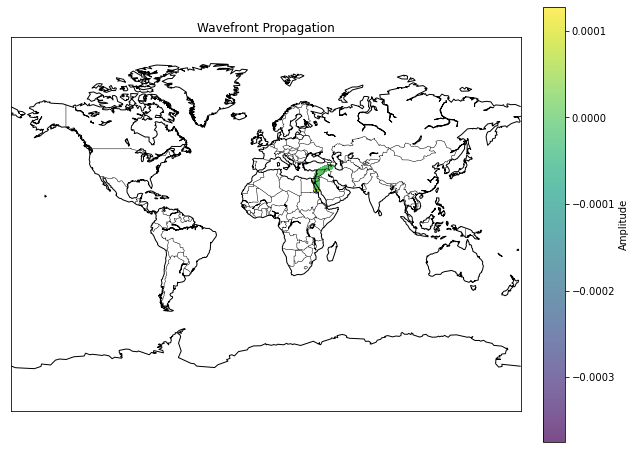

In [5]:
# Extracting latitude, longitude, and time columns
latitudes = df_gps41['ipplat'].values
longitudes = df_gps41['ipplon'].values
time_data = pd.to_datetime(df_gps41['FormattedTime'].values)
amplitudes = df_gps41['stec'].values

# Creating a map to plot the wavefront propagation
plt.figure(figsize=(10, 8))

# Create a basemap centered at a specific location
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Plotting the map background
m.drawcoastlines()
m.drawcountries()

# Plotting the wavefront propagation on the map
x, y = m(longitudes, latitudes)
m.scatter(x, y, c=convolved_signal, cmap='viridis', s=20, alpha=0.7)

# Adding colorbar for amplitude
cbar = plt.colorbar(orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Amplitude')

plt.title('Wavefront Propagation')
plt.show()